In [2]:
# Import libraries
import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.metrics import classification_report, confusion_matrix # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.feature_extraction.text import TfidfVectorizer # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore

from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.naive_bayes import GaussianNB # type: ignore
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier # type: ignore
import xgboost as xgb # type: ignore
from xgboost import XGBClassifier # type: ignore
from sklearn.linear_model import LogisticRegression  # type: ignore

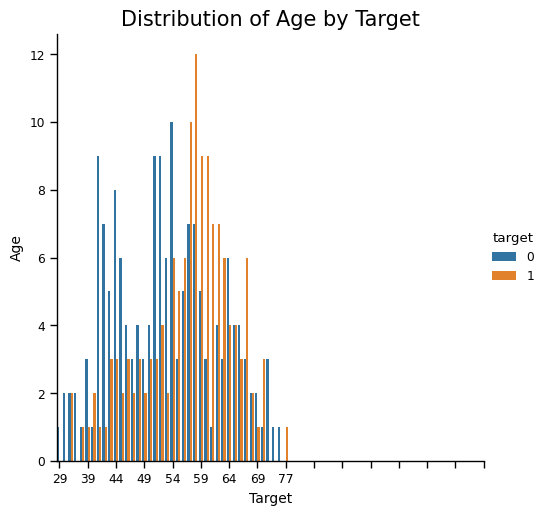

In [13]:
# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] # assign names to columns of dataframe
df['target'] = df.num.map({0:0, 1:1, 2:1, 3:1, 4:1}) # Use the 'num' column to create the 'target' column
df['thal'] = df['thal'].fillna(df['thal'].median())
df['ca'] = df['ca'].fillna(df['ca'].median())

# Vẽ phân bố của target so với age
sns.set_context('paper', font_scale=1, rc={'front.size': 3, 'axes.titlesize': 15, 'axes.labelsize': 10})
ax = sns.catplot(kind='count', data=df, x='age', hue= 'target', order= df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Distribution of Age by Target')
plt.xlabel('Target')
plt.ylabel('Age')

plt.show()

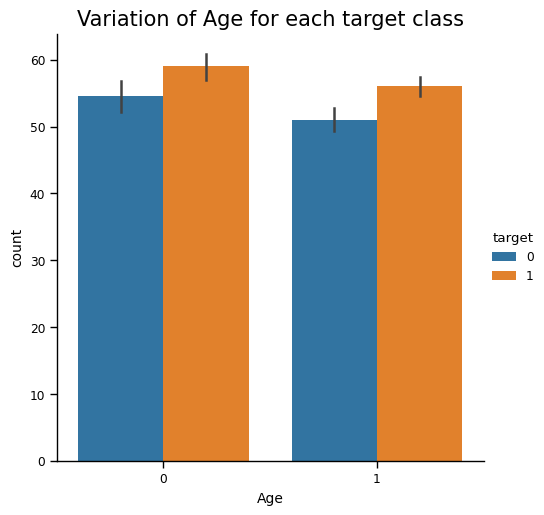

In [14]:
# Bài tập 2

# Thiết lập tiêu đề và nhãn cho các trục
sns.catplot(kind='bar', data=df, y='age', x= 'sex', hue= 'target')
# sns.barplot(x='sex', y='age', hue='target', data=df)
plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('count')

plt.show()

In [30]:
# Choose X, y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Bài tập 3: sử dụng KNN

# Create a KNN classifier with the specified parameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_train_pred3 = knn.predict(X_train)
y_test_pred3 = knn.predict(X_test)


# Calculate the confusion matrix for both training and test sets
cm_train3 = confusion_matrix(y_train, y_train_pred3)
cm_test3 = confusion_matrix(y_test, y_test_pred3)


print()
accuracy_for_train3 = np.round((cm_train3[0][0] + cm_train3[1][1])/len(y_train), 2)
acccuracy_for_test3 = np.round((cm_test3[0][0] + cm_test3[1][1])/len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier ={}'.format(accuracy_for_train3))
print('Accuracy for test set for KNeighborsClassifier ={}'.format(acccuracy_for_test3))


Accuracy for training set for KNeighborsClassifier =0.76
Accuracy for test set for KNeighborsClassifier =0.67


In [23]:
 # Bài tập 4 : SVC

# Create and train the SVM classifier with the specified parameters
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred4 = svm_model.predict(X_train)
y_test_pred4 = svm_model.predict(X_test)

# Calculate the confusion matrix for both training and test sets
cm_train4 = confusion_matrix(y_train, y_train_pred4)
cm_test4 = confusion_matrix(y_test, y_test_pred4)

# Calculate and print the accuracy for both sets
accuracy_for_train4 = np.round((cm_train4[0][0] + cm_train4[1][1]) / len(y_train), 2)
accuracy_for_test4 = np.round((cm_test4[0][0] + cm_test4[1][1]) / len(y_test), 2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train4))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test4))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [31]:
# Bài tập 5: Gausian Neive Bayes

# Create and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred5 = nb_classifier.predict(X_train)
y_test_pred5 = nb_classifier.predict(X_test)

# Calculate the confusion matrix for both training and test sets
cm_train5 = confusion_matrix(y_train_pred5, y_train)
cm_test5 = confusion_matrix(y_test_pred5, y_test)

# Calculate and print the accuracy for both sets
accuracy_for_train5 = np.round((cm_train5[0][0] + cm_train5[1][1]) / len(y_train), 2)
accuracy_for_test5  = np.round((cm_test5[0][0] + cm_test5[1][1]) / len(y_test), 2)

print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train5))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test5))

Accuracy for training set for Naive Bayes = 0.99
Accuracy for test set for Naive Bayes = 0.98


In [24]:
# Bài tập 6

# Create and train the Decision Tree classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred6 = dt_classifier.predict(X_train)
y_test_pred6 = dt_classifier.predict(X_test)

# Calculate the confusion matrix for both training and test sets
cm_train6 = confusion_matrix(y_train_pred6, y_train)
cm_test6 = confusion_matrix(y_test_pred6, y_test)

# Calculate and print the accuracy for both sets
accuracy_for_train6 = np.round((cm_train6[0][0] + cm_train6[1][1]) / len(y_train), 2)
accuracy_for_test6 = np.round((cm_test6[0][0] + cm_test6[1][1]) / len(y_test), 2)

print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train6))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test6))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 1.0


In [25]:
# Bài tập 7 : Random Forest
# Create and train the Random Forest classifier with the specified parameters
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2,
                                       n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred7 = rf_classifier.predict(X_train)
y_test_pred7 = rf_classifier.predict(X_test)

# Calculate the confusion matrix for both training and test sets
cm_train7 = confusion_matrix(y_train_pred7, y_train)
cm_test7 = confusion_matrix(y_test_pred7, y_test)

# Calculate and print the accuracy for both sets
accuracy_for_train7 = np.round((cm_train7[0][0] + cm_train7[1][1]) / len(y_train), 2)
accuracy_for_test7 = np.round((cm_test7[0][0] + cm_test7[1][1]) / len(y_test), 2)

print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train7))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test7))

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.98


In [26]:
# Bài tập 8 : AdaBoost Classifier

# Create and train the AdaBoost classifier with the specified parameters
ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_classifier.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred8 = ada_classifier.predict(X_train)
y_test_pred8 = ada_classifier.predict(X_test)

# Calculate the confusion matrix for both training and test sets
cm_train8 = confusion_matrix(y_train_pred8, y_train)
cm_test8 = confusion_matrix(y_test_pred8, y_test)

# Calculate and print the accuracy for both sets
accuracy_for_train8 = np.round((cm_train8[0][0] + cm_train8[1][1]) / len(y_train), 2)
accuracy_for_test8 = np.round((cm_test8[0][0] + cm_test8[1][1]) / len(y_test), 2)

print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train8))
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test8))

Accuracy for training set for Adaboost = 1.0
Accuracy for test set for Adaboost = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [22]:
# Bài tập 9 : Gradient Boosting Classifier

# Create and train the Gradient Boosting classifier with the specified parameters
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                           min_samples_split=2, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred9 = gb_classifier.predict(X_train)
y_test_pred9 = gb_classifier.predict(X_test)

# Calculate the confusion matrix for both training and test sets
cm_train9 = confusion_matrix(y_train, y_train_pred9)
cm_test9 = confusion_matrix(y_test, y_test_pred9)

# Calculate and print the accuracy for both sets
accuracy_for_train9 = np.round((cm_train9[0][0] + cm_train9[1][1]) / len(y_train), 2)
accuracy_for_test9 = np.round((cm_test9[0][0] + cm_test9[1][1]) / len(y_test), 2)

print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train9))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test9))

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 1.0


In [ ]:
# Bài tập 10: XGBoost Classifier

# Khởi tạo mô hình XGBoost
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred10 = model.predict(X_train)
y_test_pred10 = model.predict(X_test)

# Tính toán ma trận nhầm lẫn
cm_train10 = confusion_matrix(y_train, y_train_pred10)
cm_test10 = confusion_matrix(y_test, y_test_pred10)

# Tính toán độ chính xác
accuracy_for_train10 = np.round((cm_train10[0][0] + cm_train10[1][1]) / len(y_train), 2)
accuracy_for_test10 = np.round((cm_test10[0][0] + cm_test10[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train10))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test10))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 1.0


In [27]:
# Bài tập 11: Stacking

# Khởi tạo các mô hình cơ sở cho Stacking
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Tạo mô hình Stacking
estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred11 = stacking_model.predict(X_train)
y_test_pred11 = stacking_model.predict(X_test)

# Tính toán ma trận nhầm lẫn
cm_train11 = confusion_matrix(y_train_pred11, y_train)
cm_test11 = confusion_matrix(y_test_pred11, y_test)

# Tính toán độ chính xác
accuracy_for_train11 = np.round((cm_train11[0][0] + cm_train11[1][1]) / len(y_train), 2)
accuracy_for_test11 = np.round((cm_test11[0][0] + cm_test11[1][1]) / len(y_test), 2)

# In ra độ chính xác
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train11))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test11))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1